# Predator-Prey Model
We explore how population of fox and rabbits change over time as they share the same enronment. Rabbits multiply fast as long as they have enough food resources for the growing group. However, when we introduce Foxes in the same area, the following happens: When only few Foxes are introduced to a bog community of Rabbits, it is a paradise for the few Foxes who have practically unlimited source of food. So, the Fox community start gtrowing very fast. At some point, there are so many Foxes that eat some many Rabbits (each Fox eats dozens of Rabbits) and this starts to effect the Rabbit population. The number of Rabbits stop growing and start declining. At a result, after some time, the many Foxes do not have enough Rabbit to eat, and so the Fox population also beging to shrink, as many Foxes die from hunger. With a smaller population of Foxes, Rabbits are eaten less, and now they start grow in population again. This is a cyclic loop of the size of population of Foxes and Rabbits. We can see how it happens step by step with an easy simulation shown here below.
Source: https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=eb76ab8ba43271e89d940ee4e511dad0ca99b9d3&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f494e415349432f7072656461746f722d707265795f73797374656d732f656237366162386261343332373165383964393430656534653531316461643063613939623964332f4d6f64656c6c696e672532305072656461746f722d5072657925323053797374656d73253230696e253230507974686f6e2e6970796e62&logged_in=false&nwo=INASIC%2Fpredator-prey_systems&path=Modelling+Predator-Prey+Systems+in+Python.ipynb&platform=android&repository_id=98260333&repository_type=Repository&version=98

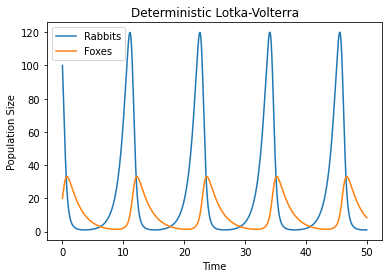

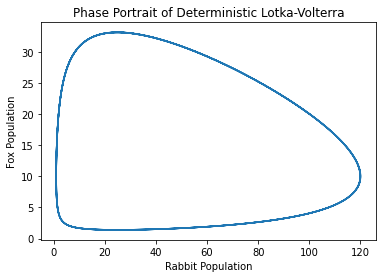

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

# use euler method of integration
for index in range(1,len(t)):
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """

plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Rabbits', 'Foxes'))
plt.title('Deterministic Lotka-Volterra')
plt.show()

# deterministic phase portrait
plt.plot(x,y)
plt.xlabel('Rabbit Population')
plt.ylabel('Fox Population')
plt.title('Phase Portrait of Deterministic Lotka-Volterra')
plt.show()
